In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(f"tensorflow: {tf.__version__}")


tensorflow: 2.15.0


In [72]:
import matplotlib.pyplot as plt
import numpy as np
import random

#1. LOAD DATA

In [73]:
(X_train, y_train) , (X_test, y_test) =  keras.datasets.fashion_mnist.load_data()

In [74]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [75]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

cấu trúc của x train kiểu int

In [76]:
X_train.dtype

dtype('uint8')

In [77]:
class_name = ["T-shirt", "trouser", "PullOver", "Dress","Coat", "Sandan",
              "Shirt",  "Sneaker", "Bag", "Anker Boot"]
class_num = len(class_name)
class_name[y_train[0]]

'Anker Boot'

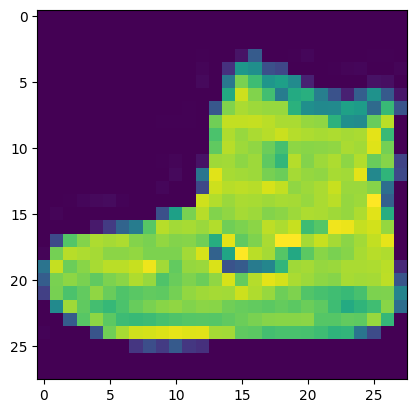

In [78]:
plt.imshow(X_train[0])

hàm in ra ngẫu nhiên 8 ảnh trong tập train
gôm 2 hàng 4 cột -> 8 phần tử
len_x là lấy ra chiều dài phần tử, trong trường hợp này là 60000
dùng vòng for duyệt qua ncol và nrow  và in ra

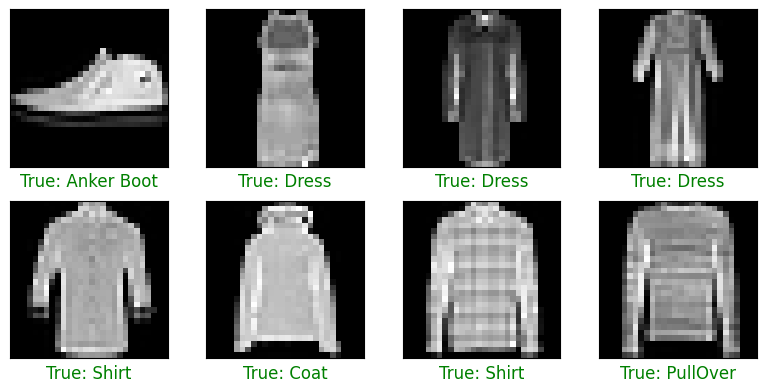

In [79]:
def plt_data(x_data: np.ndarray,y_data: np.ndarray) -> None:
  nrow, ncol = 2,4
  fig, axes = plt.subplots(nrow, ncol, figsize = (8, 4))
  len_x = x_data.shape[0]
  for idx in range (nrow* ncol):
    ax = axes[idx // ncol, idx % ncol]
    img_idx = random.randint(0, len_x)
    ax.imshow(x_data[img_idx], cmap = 'gray')
    #xóa các chữ số
    ax.set(xticks=[], yticks=[])
    #in ra gọn hơn
    #lấy tên của nhãn tương ứng
    true_labe_str = f"True: {class_name[y_data[img_idx]]}"
    ax.set_xlabel(true_labe_str, color = 'green', fontsize = 12)

  plt.tight_layout()
  plt.show()

plt_data(X_train, y_train)


#2.Image -preprocessing
chuyển các ảnh từ 0-255 thành 0-1

chuyển data từ int sang float


In [80]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255


In [81]:
X_train.shape, X_test.dtype

((60000, 28, 28), dtype('float32'))

X_train ở trên đang là 3 kênh, 60000 bức ảnh, chiều rộng 28, dài 28, nhưng train cần 4 kênh, thêm kênh màu nữa


In [82]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [83]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Chuyển lable từ dạng 0,1,2,3,4... sang dạng mảng
ví dụ số 7 là [0,0,0,0,0,0,0,1,0,0,0]

In [84]:
y_train_label = keras.utils.to_categorical(y_train, class_num)
y_test_label = keras.utils.to_categorical(y_test, class_num)


In [85]:
#test sau khi chuyển sang mảng
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

#3. Triển khai ANN


In [86]:
input_shape = (28,28,1)

In [87]:
model = keras.models.Sequential([
    layers.Flatten(input_shape = input_shape), #chuyển mảng từ [28,28,1] thành 28*28*1 = 784
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_num, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy'
              )

In [90]:
epochs=10
batch_size = 128
history = model.fit(X_train, y_train_label,
          epochs = epochs,
          batch_size = batch_size,
          validation_split = 0.1)


Epoch 1/10
422/422 [==============================] - 13s 32ms/step - loss: 0.2194 - accuracy: 0.9173 - val_loss: 0.3220 - val_accuracy: 0.8912
Epoch 2/10
422/422 [==============================] - 13s 31ms/step - loss: 0.2140 - accuracy: 0.9192 - val_loss: 0.3431 - val_accuracy: 0.8932
Epoch 3/10
422/422 [==============================] - 6s 15ms/step - loss: 0.2071 - accuracy: 0.9201 - val_loss: 0.3816 - val_accuracy: 0.8820
Epoch 4/10
422/422 [==============================] - 8s 18ms/step - loss: 0.1993 - accuracy: 0.9238 - val_loss: 0.3912 - val_accuracy: 0.8722
Epoch 5/10
422/422 [==============================] - 6s 14ms/step - loss: 0.1933 - accuracy: 0.9275 - val_loss: 0.4086 - val_accuracy: 0.8833
Epoch 6/10
422/422 [==============================] - 8s 19ms/step - loss: 0.1912 - accuracy: 0.9269 - val_loss: 0.4339 - val_accuracy: 0.8830
Epoch 7/10
422/422 [==============================] - 6s 14ms/step - loss: 0.1846 - accuracy: 0.9301 - val_loss: 0.3906 - val_accuracy: 0.88

In [91]:
history_dict = history.history

In [92]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [93]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
accuracy, val_accuracy = history_dict['accuracy'], history_dict['val_accuracy']

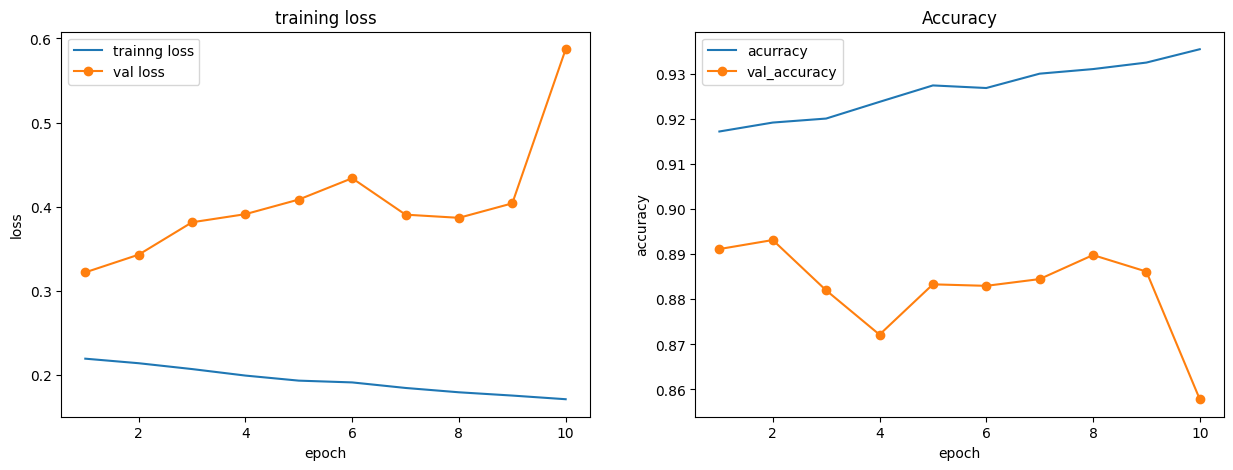

In [94]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label='trainng loss')
ax1.plot(epoch_runs, val_loss, label='val loss', marker = 'o')
ax1.set(title='training loss', xlabel='epoch', ylabel='loss')
ax1.legend() #hiển thị ghi chú góc trên bên trái



ax2.plot(epoch_runs, accuracy, label='acurracy')
ax2.plot(epoch_runs, val_accuracy, label='val_accuracy', marker = 'o')
ax2.set(title='Accuracy', xlabel='epoch', ylabel='accuracy')
ax2.legend() #hiển thị ghi chú góc trên bên phải


plt.show()

#4.Model Evaluation

In [95]:
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 2s 5ms/step - loss: 0.6274 - accuracy: 0.8497


In [96]:
print(f"test los: {score[0]:.4f}")
print(f"test accuracy: {score[1]:.4f}")

test los: 0.6274
test accuracy: 0.8497


#5. predict


lấy ra 3 phần tử để test

In [97]:
X_example = X_test[0:3]
y_pre = model.predict(X_example)

1/1 [==============================] - 0s 107ms/step


hiển thị sau khi dự đoán, nhưng nó vẫn ở dạng mảng

In [98]:
y_pre

array([[1.3116766e-14, 2.1388032e-12, 2.5390686e-12, 2.7324020e-11,
        1.6052497e-10, 2.4447600e-10, 1.1163355e-10, 1.2870063e-06,
        4.0554735e-14, 9.9999869e-01],
       [3.1664385e-05, 2.4647656e-21, 9.9762648e-01, 4.1188647e-14,
        6.0568073e-06, 1.2918140e-13, 2.3358345e-03, 1.2545834e-14,
        4.5891254e-15, 4.0288097e-15],
       [4.3876649e-24, 1.0000000e+00, 9.6136167e-36, 1.3763421e-19,
        7.7782099e-31, 1.8553565e-29, 4.7458259e-24, 5.2274869e-30,
        5.9444285e-32, 3.9914792e-32]], dtype=float32)

In [106]:
y_pre.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.998, 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [107]:
prediction = np.argmax(y_pre, axis = 1)
prediction

array([9, 2, 1])

In [100]:
[class_name[pred] for pred in prediction]

['Anker Boot', 'PullOver', 'trouser']

In [109]:
y_pre = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


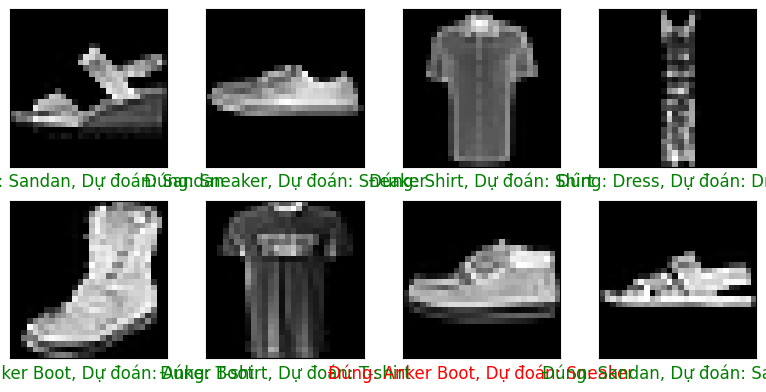

In [111]:
from typing import Optional
def plt_show(x_data: np.ndarray, y_data: np.ndarray, y_pre: Optional[np.ndarray] = None) -> None:
    nrow, ncol = 2, 4
    fig, axes = plt.subplots(nrow, ncol, figsize=(8, 4))
    len_x = x_data.shape[0]

    for idx in range(nrow * ncol):
        ax = axes[idx // ncol, idx % ncol]
        img_idx = random.randint(0, len_x - 1)  # Đảm bảo chỉ số nằm trong giới hạn
        ax.imshow(x_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[])  # Xóa các ticks

        color = 'green'
        true_label_str = f"Đúng: {class_name[y_data[img_idx]]}"

        predicted_label_str = ""
        if y_pre is not None:
            predicted_idx = np.argmax(y_pre[img_idx])
            prediction_label = class_name[predicted_idx]
            color = 'red' if predicted_idx != y_data[img_idx] else color
            predicted_label_str = f", Dự đoán: {prediction_label}"

        img_title = true_label_str + predicted_label_str
        ax.set_xlabel(img_title, color=color, fontsize=12)

    plt.tight_layout()
    plt.show()

# Sử dụng ví dụ (đảm bảo bạn đã định nghĩa class_name, X_test, y_test và y_pre đúng cách)
# plt_show(X_test, y_test, y_pre)

plt_show(X_test, y_test, y_pre)